In [ ]:
pip install pandas

In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Definición de aeropuertos y rango de fechas para simulación
airports = ["BOS","CLT","DEN","DFW","DTW","EWR","IAD","JFK","LAX","LGA","MIA","OAK","ORD","PHL","SFO","ATL"]
start_date = datetime.strptime("2024-11-22", "%Y-%m-%d")
end_date = datetime.strptime("2024-12-22", "%Y-%m-%d")
date_range = pd.date_range(start_date, end_date)

records = []
for date in date_range:
    for airport in airports:
        flight_date = date + timedelta(days=np.random.randint(1,31))
        search_date = date
        date_diff = (flight_date - search_date).days
        destination_airport = random.choice([a for a in airports if a != airport])
        total_fare = np.random.randint(100,1000)
        is_basic_economy = np.random.randint(0,2)
        is_refundable = np.random.randint(0,2)
        is_non_stop = np.random.randint(0,2)
        records.append({
            "date_diff": date_diff,
            "starting_airport": airport,
            "destination_airport": destination_airport,
            "total_fare": total_fare,
            "is_basic_economy": is_basic_economy,
            "is_refundable": is_refundable,
            "is_non_stop": is_non_stop,
            "flight_date": flight_date,
            "search_date": search_date
        })
flight_df = pd.DataFrame(records)
print("Dataset simulado con", len(flight_df), "registros")
flight_df.tail()


Dataset simulado con 496 registros


,date_diff,starting_airport,destination_airport,total_fare,is_basic_economy,is_refundable,is_non_stop,flight_date,search_date
491,6,OAK,DEN,769,1,0,1,2024-12-28,2024-12-22
492,20,ORD,IAD,923,0,0,0,2025-01-11,2024-12-22
493,24,PHL,ATL,856,0,0,1,2025-01-15,2024-12-22
494,7,SFO,OAK,229,1,1,1,2024-12-29,2024-12-22
495,24,ATL,BOS,182,0,0,1,2025-01-15,2024-12-22


In [3]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cols = pd.DataFrame(encoder.fit_transform(flight_df[["starting_airport", "destination_airport"]]))
encoded_cols.columns = encoder.get_feature_names_out(["starting_airport", "destination_airport"])
flight_df_encoded = pd.concat([flight_df.reset_index(drop=True), encoded_cols], axis=1)
flight_df_encoded.drop(columns=["starting_airport","destination_airport", "flight_date", "search_date"], inplace=True)

flight_df_encoded.head()


,date_diff,total_fare,is_basic_economy,is_refundable,is_non_stop,starting_airport_ATL,starting_airport_BOS,starting_airport_CLT,starting_airport_DEN,starting_airport_DFW,...,destination_airport_EWR,destination_airport_IAD,destination_airport_JFK,destination_airport_LAX,destination_airport_LGA,destination_airport_MIA,destination_airport_OAK,destination_airport_ORD,destination_airport_PHL,destination_airport_SFO
0,30,736,1,0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,20,130,0,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12,706,0,1,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10,120,0,1,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30,419,1,1,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = flight_df_encoded.drop(columns=["total_fare"])
y = flight_df_encoded["total_fare"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño conjunto entrenamiento: {len(X_train)}")
print(f"Tamaño conjunto prueba: {len(X_test)}")


Tamaño conjunto entrenamiento: 396
Tamaño conjunto prueba: 100


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Modelo entrenado")


Modelo entrenado


In [6]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")


MAE: 210.54
MSE: 61062.42
R2: -0.04


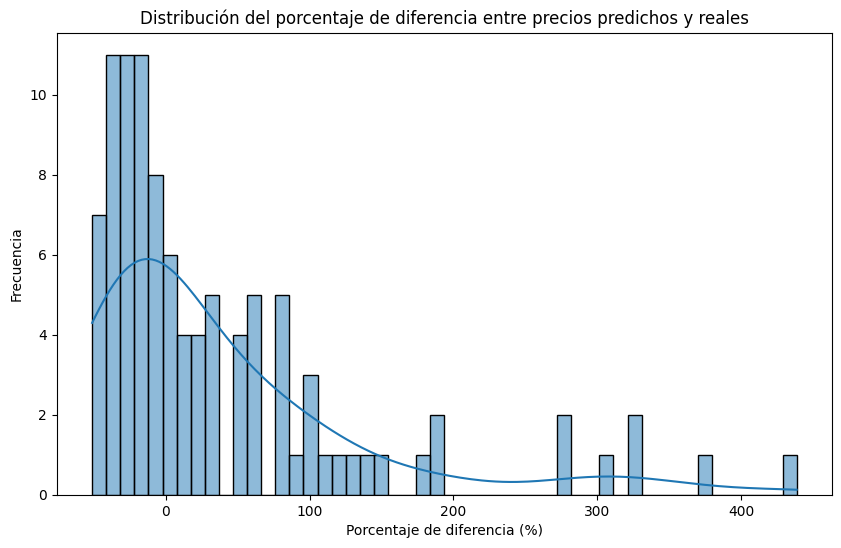

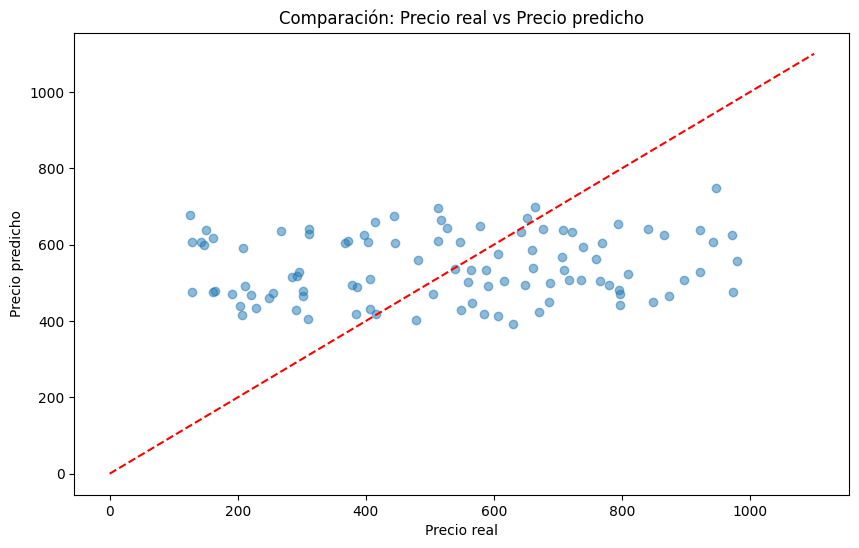

In [7]:
results_df = X_test.copy()
results_df["actual_fare"] = y_test.values
results_df["predicted_fare"] = y_pred
results_df["percent_diff"] = (results_df["predicted_fare"] - results_df["actual_fare"]) / results_df["actual_fare"] * 100

plt.figure(figsize=(10,6))
sns.histplot(results_df["percent_diff"], bins=50, kde=True)
plt.title("Distribución del porcentaje de diferencia entre precios predichos y reales")
plt.xlabel("Porcentaje de diferencia (%)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(results_df["actual_fare"], results_df["predicted_fare"], alpha=0.5)
plt.plot([0, 1100], [0, 1100], color='red', linestyle='--')
plt.title("Comparación: Precio real vs Precio predicho")
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.show()


In [8]:
def predict_price(date_diff, starting_airport, destination_airport, is_basic_economy, is_refundable, is_non_stop):
    # Crear dataframe con características
    input_dict = {
        "date_diff": [date_diff],
        "is_basic_economy": [is_basic_economy],
        "is_refundable": [is_refundable],
        "is_non_stop": [is_non_stop]
    }

    for col in encoder.get_feature_names_out(["starting_airport", "destination_airport"]):
        input_dict[col] = [0]

    start_col = f"starting_airport_{starting_airport}"
    dest_col = f"destination_airport_{destination_airport}"

    if start_col in input_dict:
        input_dict[start_col][0] = 1
    if dest_col in input_dict:
        input_dict[dest_col][0] = 1

    input_df = pd.DataFrame(input_dict)
    # Ajuste si faltan columnas por cada codificación
    missing_cols = set(X.columns) - set(input_df.columns)
    for mc in missing_cols:
        input_df[mc] = 0
    input_df = input_df[X.columns]

    pred = model.predict(input_df)[0]
    return pred

# Ejemplo
predicted_price = predict_price(date_diff=15, starting_airport="JFK", destination_airport="LAX", is_basic_economy=0, is_refundable=1, is_non_stop=1)
print(f"Precio predicho para el ejemplo: {predicted_price:.2f}")


Precio predicho para el ejemplo: 362.05


# Task
Adapt the existing Python code to load flight data from a CSV file named 'flight_data.csv'. The data will be processed by renaming columns such as `elapsedDays` to `date_diff`, `startingAirport` to `starting_airport`, `destinationAirport` to `destination_airport`, `isBasicEconomy` to `is_basic_economy`, `isRefundable` to `is_refundable`, `isNonStop` to `is_non_stop`, and `totalFare` to `total_fare`. Unnecessary columns like `flightDate` and `searchDate` will be dropped. Subsequently, apply one-hot encoding to `starting_airport` and `destination_airport` columns, train a `LinearRegression` model, evaluate its performance using MAE, MSE, and R-squared, and update the `predict_price` function to work with the new data structure.

## Load Dataset

### Subtask:
Load the flight data from a CSV file named 'flight_data.csv' (you might need to adjust the filename if it's different) into a pandas DataFrame. Then, select and rename the necessary columns to align with the previous code's expectations: `elapsedDays` to `date_diff`, `startingAirport` to `starting_airport`, `destinationAirport` to `destination_airport`, `isBasicEconomy` to `is_basic_economy`, `isRefundable` to `is_refundable`, `isNonStop` to `is_non_stop`, and `totalFare` to `total_fare`. Drop any other unnecessary columns from the original dataset before proceeding.


**Reasoning**:
I need to load the 'flight_data.csv' file into a pandas DataFrame, rename specified columns, drop the 'flightDate' and 'searchDate' columns, and then display the first few rows of the modified DataFrame as per the instructions.



In [4]:
import pandas as pd

# 1. Cargar solo las primeras 100,000 filas (para evitar MemoryError)
df_reducido = pd.read_csv(
    'flight_data.csv',
    nrows=3000000 
)

df_reducido.rename(columns={
    'elapsedDays': 'date_diff',
    'startingAirport': 'starting_airport',
    'destinationAirport': 'destination_airport',
    'totalFare': 'total_fare'
}, inplace=True)

df_reducido.to_csv('dataset_reducido_100k.csv', index=False)

1. Carga de librerias y datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ARCHIVO_REDUCIDO = 'dataset_reducido_100k.csv'

df = pd.read_csv(ARCHIVO_REDUCIDO)

df.rename(columns={
    'elapsedDays': 'date_diff',
    'startingAirport': 'starting_airport',
    'destinationAirport': 'destination_airport',
    'totalFare': 'total_fare'
}, inplace=True)

TARGET = 'total_fare'
df['Y'] = df[TARGET]
df.drop(TARGET, axis=1, inplace=True)

# Conversión y Feat. Eng. de Tiempo
df['flightDate'] = pd.to_datetime(df['flightDate'], errors='coerce')
df['mes_vuelo'] = df['flightDate'].dt.month
df['dia_semana_vuelo'] = df['flightDate'].dt.dayofweek

for col in ['isBasicEconomy', 'isRefundable', 'isNonStop']:
    df[col] = df[col].astype(int)

# Transformación Logarítmica del Target (si aplica)
if (df['Y'] > 0).all():
    df['Y_log'] = np.log1p(df['Y'])

In [12]:
# --- Corrección a la Advertencia y Limpieza de Nulos ---

# Conteo de Valores Nulos
print("\n--- Conteo de Valores Nulos ---")
print(df.isnull().sum())

# 1. Relleno para columnas numéricas con 0
columnas_numericas_fillna = df.select_dtypes(include=np.number).columns
for col in columnas_numericas_fillna:
    # Corrección: Asignar directamente para evitar la advertencia
    df[col] = df[col].fillna(0) 

# 2. Relleno para columnas categóricas con la moda
columnas_categoricas_fillna = df.select_dtypes(include='object').columns
for col in columnas_categoricas_fillna:
    # Corrección: Asignar directamente para evitar la advertencia
    moda_val = df[col].mode()[0]
    df[col] = df[col].fillna(moda_val)

print("\n--- Verificación post-relleno de Nulos ---")
print(f"Total de Nulos en el DataFrame: {df.isnull().sum().sum()}")


# --- Ingeniería de Características de Fecha y Tiempo ---

# Las columnas de fecha y tiempo son cruciales, debemos convertirlas a formato datetime
# y extraer información útil (día de la semana, mes, etc.).

# Convertir las columnas de fecha a datetime (errores='coerce' convierte valores inválidos a NaT)
df['flightDate'] = pd.to_datetime(df['flightDate'], errors='coerce')
df['searchDate'] = pd.to_datetime(df['searchDate'], errors='coerce')

# Calcular la diferencia de días entre la búsqueda y el vuelo (ya tienes 'date_diff', pero es bueno tener la fecha)
# Esto nos permite ver si hay variaciones por día/mes
df['mes_vuelo'] = df['flightDate'].dt.month
df['dia_semana_vuelo'] = df['flightDate'].dt.dayofweek # Lunes=0, Domingo=6

# Convertir las columnas booleanas a int (0 o 1) para el modelo
for col in ['isBasicEconomy', 'isRefundable', 'isNonStop']:
    df[col] = df[col].astype(int)

# Eliminamos las columnas de fecha y raw time que ya no necesitamos directamente en X
df.drop(columns=['searchDate', 'flightDate', 
                 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw'], 
        inplace=True, errors='ignore')


## Visualización de la variable objetivo (total_fare / Y)
# ... (El código de visualización para Y y Y_log se mantiene igual)

if (df['Y'] > 0).all():
    df['Y_log'] = np.log1p(df['Y'])
    # Se omiten los gráficos aquí para ahorrar espacio, pero se ejecutarían en el notebook.
else:
    print("\nNo se aplica transformación logarítmica debido a valores <= 0 en Y.")


--- Conteo de Valores Nulos ---
legId                                0
searchDate                           0
flightDate                           0
starting_airport                     0
destination_airport                  0
fareBasisCode                        0
travelDuration                       0
date_diff                            0
isBasicEconomy                       0
isRefundable                         0
isNonStop                            0
baseFare                             0
seatsRemaining                       0
totalTravelDistance                  0
segmentsDepartureTimeEpochSeconds    0
segmentsDepartureTimeRaw             0
segmentsArrivalTimeEpochSeconds      0
segmentsArrivalTimeRaw               0
segmentsArrivalAirportCode           0
segmentsDepartureAirportCode         0
segmentsAirlineName                  0
segmentsAirlineCode                  0
segmentsEquipmentDescription         0
segmentsDurationInSeconds            0
segmentsDistance               

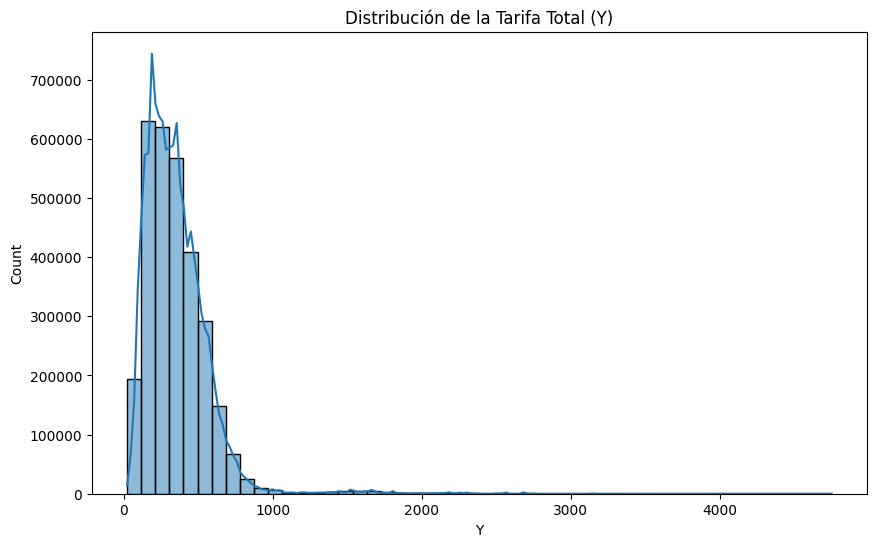

In [18]:
# Distribución de la Tarifa Total
plt.figure(figsize=(10, 6))
sns.histplot(df['Y'], bins=50, kde=True)
plt.title('Distribución de la Tarifa Total (Y)')
plt.show()
# ... (Bloque de código para Y_log)


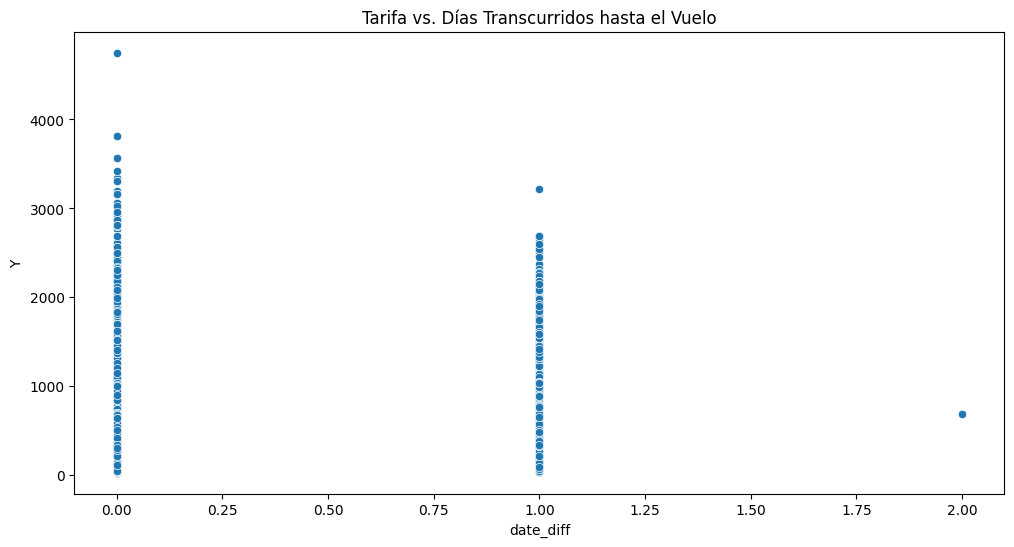

In [19]:
# Relación entre Días Transcurridos y Tarifa
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date_diff', y='Y', data=df.sample(frac=0.1)) 
plt.title('Tarifa vs. Días Transcurridos hasta el Vuelo')
plt.show()

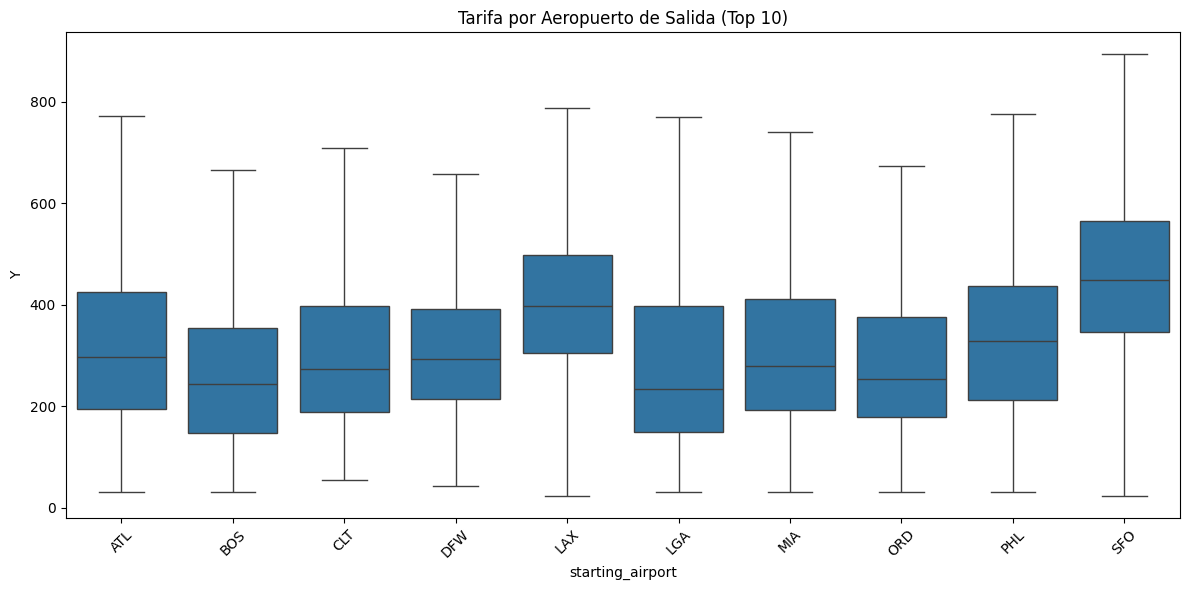

In [20]:
# Tarifa por Aeropuerto de Salida (Top 10)
top_10_start = df['starting_airport'].value_counts().nlargest(10).index
df_top = df[df['starting_airport'].isin(top_10_start)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='starting_airport', y='Y', data=df_top, showfliers=False) 
plt.title('Tarifa por Aeropuerto de Salida (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=['Y', 'Y_log', TARGET, 'legId', 'fareBasisCode', 'travelDuration', 'flightDate', 'searchDate'], axis=1, errors='ignore') 
y = df['Y_log'] if 'Y_log' in df.columns else df['Y']
COLUMNAS_OHE = [
    'starting_airport', 
    'destination_airport',
    'mes_vuelo', 
    'dia_semana_vuelo', 
    'isBasicEconomy', 
    'isRefundable', 
    'isNonStop',
    'seatsRemaining'
]

COLUMNAS_CONTINUAS = ['date_diff', 'baseFare', 'totalTravelDistance', 'segmentsDistance']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[COLUMNAS_OHE])
df_encoded = pd.DataFrame(
    X_encoded, 
    columns=encoder.get_feature_names_out(COLUMNAS_OHE), 
    index=X.index
)

X_final = pd.concat([X[COLUMNAS_CONTINUAS], df_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

In [28]:
# Entrenamiento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred_test = modelo.predict(X_test)

MemoryError: Unable to allocate 1.13 GiB for an array with shape (63, 2400000) and data type object

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import SGDRegressor 
from scipy.sparse import hstack, csr_matrix 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# --- 1. Definiciones de Features (Asumiendo que df ya está cargado y limpio) ---
TARGET = 'total_fare'
y = df['Y_log'] if 'Y_log' in df.columns else df['Y']
X = df.drop(columns=['Y', 'Y_log', TARGET, 'legId', 'fareBasisCode', 
                     'travelDuration', 'flightDate', 'searchDate'], axis=1, errors='ignore') 

COLUMNAS_OHE = [
    'starting_airport', 
    'destination_airport',
    'mes_vuelo', 
    'dia_semana_vuelo', 
    'isBasicEconomy', 
    'isRefundable', 
    'isNonStop',
    'seatsRemaining'
]

COLUMNAS_CONTINUAS = ['date_diff', 'baseFare', 'totalTravelDistance', 'segmentsDistance']


# --- 2. Preprocesamiento con Matriz Dispersa (Corrección MemoryError y ValueError) ---

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True) 
X_encoded_sparse = encoder.fit_transform(X[COLUMNAS_OHE])

# Prepara las columnas continuas
X_continuas = X[COLUMNAS_CONTINUAS]

# CORRECCIÓN: Asegurar que las columnas continuas son float (Corrige ValueError)
X_continuas_np = X_continuas.astype(float).values 

# Convierte el array numérico a matriz dispersa
X_continuas_sparse = csr_matrix(X_continuas_np) 

# Combina todas las características en una sola matriz dispersa
X_final_sparse = hstack([X_continuas_sparse, X_encoded_sparse])


# --- 3. División de Datos ---
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(
    X_final_sparse, y, test_size=0.2, random_state=42
)


# --- 4. Entrenamiento con SGDRegressor ---

# SGDRegressor requiere escalado del target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Entrena el modelo SGDRegressor
modelo_sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
modelo_sgd.fit(X_train_sparse, y_train_scaled)



# --- 5. Predicciones y Evaluación (Continuación) ---

y_pred_test_scaled = modelo_sgd.predict(X_test_sparse)

# Revertir el escalado
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()

# Revertir transformación logarítmica si se usó
if 'Y_log' in df.columns:
    y_test_real = np.expm1(y_test)
    y_pred_real = np.expm1(y_pred_test)
else:
    y_test_real = y_test
    y_pred_real = y_pred_test

# Evaluación
mae_test = mean_absolute_error(y_test_real, y_pred_real)
rmse_test = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
r2_test = r2_score(y_test_real, y_pred_real)

print(f"--- Métrica del Modelo SGDRegressor (en moneda) ---")
print(f"Error Absoluto Medio (MAE) en Test: ${mae_test:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) en Test: ${rmse_test:.2f}")
print(f"Coeficiente de Determinación (R²) en Test: {r2_test:.4f}")

ValueError: could not convert string to float: '228||728'